# LeNet-5 (1998) with tf.keras

## Overview
LeNet-5 architecture, based on their paper (<a>http://yann.lecun.com/exdb/publis/index.html#lecun-98</a>). Tf keras used in this implemention.

LeNet-5 is one of the simplest architectures. It has 2 convolutional and 3 fully-connected layers (hence “5” — it is very common for the names of neural networks to be derived from the number of convolutional and fully connected layers that they have). The average-pooling layer as we know it now was called a sub-sampling layer and it had trainable weights (which isn’t the current practice of designing CNNs nowadays). This architecture has about 60,000 parameters.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist as mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Download Data Set & Normalize
Original input is 32x32 but we use fashion-mnist ( Fashion-MNIST database of fashion articles, https://keras.io/datasets/).


In [5]:
# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
number_of_labels= len(np.unique(y_train))

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Transform lables to one-hot encoding
#y_train = tf.keras.utils.to_categorical(y_train, number_of_labels)
#y_test = tf.keras.utils.to_categorical(y_test, number_of_labels)

# Reshape the dataset into 4D array
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


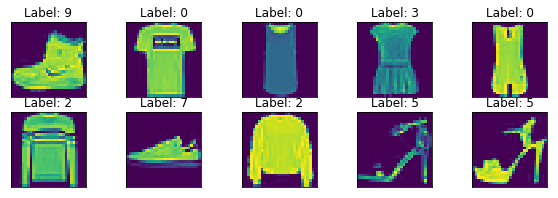

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
for i in range(10):
  img = np.reshape(x_train[i],(28,28))
  plt.subplot(5,5,i+1).set_title(f'Label: {y_train[i]}')
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])

In [105]:
# To prevent overfitting , ImageDataGenerator used to re-generate images with new scale.
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# for test data generator just uses rescale
validation_image_generator = ImageDataGenerator(
    rescale = 1./255
)

train_gen = train_image_generator.flow(x_train, y_train, batch_size=128)
validation_gen = validation_image_generator.flow(x_test, y_test, batch_size=128)


### LeNet-5 Architecture
<img src="https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg" alt="Architecture" style="width: 500px; float:center"/>

In [106]:
model = tf.keras.models.Sequential([
    layers.Conv2D(filters=6,input_shape=(28,28,1), kernel_size=(5,5),strides=(1,1), padding='same', activation='tanh'),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(filters=16, kernel_size=(5,5), activation='tanh'),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(filters=120, kernel_size=(5,5), activation='tanh'),
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_24 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_25 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_11 (Flatten)         (None, 120)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 84)                10164     
__________

In [107]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=len(x_train) / 128,
                              epochs=20,
                              validation_data=validation_gen,
                              validation_steps=len(x_test) / 128)

model.evaluate(x_test, y_test)

Epoch 1/20
469/469 [==============================] - 11s 24ms/step - loss: 1.5559 - acc: 0.4315 - val_loss: 0.9997 - val_acc: 0.6349
Epoch 2/20
469/469 [==============================] - 11s 24ms/step - loss: 1.1163 - acc: 0.5839 - val_loss: 0.8561 - val_acc: 0.6634
Epoch 3/20
469/469 [==============================] - 11s 24ms/step - loss: 0.9696 - acc: 0.6319 - val_loss: 0.7631 - val_acc: 0.7037
Epoch 4/20
469/469 [==============================] - 11s 23ms/step - loss: 0.9106 - acc: 0.6529 - val_loss: 0.7334 - val_acc: 0.7165
Epoch 5/20
469/469 [==============================] - 11s 24ms/step - loss: 0.8688 - acc: 0.6642 - val_loss: 0.6958 - val_acc: 0.7243
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 0.8336 - acc: 0.6802 - val_loss: 0.6626 - val_acc: 0.7408
Epoch 7/20
469/469 [==============================] - 11s 24ms/step - loss: 0.8071 - acc: 0.6923 - val_loss: 0.6399 - val_acc: 0.7492
Epoch 8/20
469/469 [==============================] - 11s 23ms

[0.9742051300048828, 0.6379]

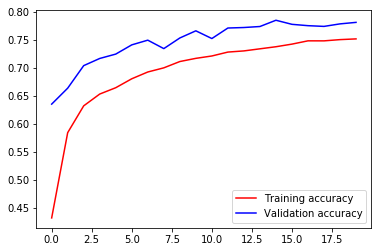

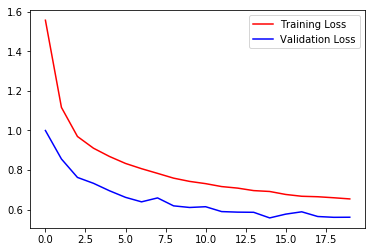

In [108]:
## Visualize the Training Process
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
#plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
#plt.title('Training and validation loss')
plt.legend()

plt.show()